In [55]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn import preprocessing
import seaborn
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [19]:
creatures_df = pd.read_json("creatures_data_v2.json")

creatures_df.tail(2)

,name,hit_points,can_be_summoned,can_be_convinced,see_invisible,can_be_paralysed,exp_points,weak_vs_earth,strong_vs_earth,immune_to_earth,...,immune_to_holy,weak_vs_agony,strong_vs_agony,immune_to_agony,weak_vs_fire,strong_vs_fire,immune_to_fire,weak_vs_ice,strong_vs_ice,immune_to_ice
616,Young Sea Serpents,1050,0,0,1,0,1000,0,0,1,...,0,0,0,0,0,1,0,0,0,1
617,Zombies,500,0,0,0,0,280,0,0,1,...,0,0,0,0,0,1,0,0,0,1


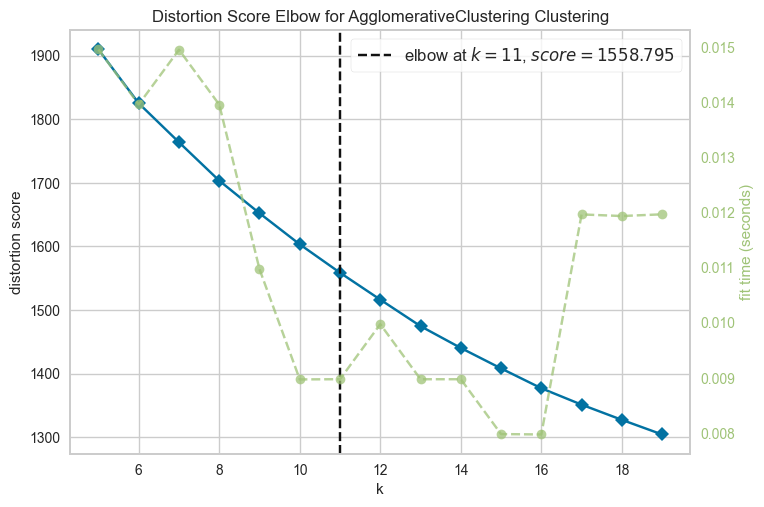

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# Remove names
features = creatures_df[creatures_df.columns [1:]].columns

# Feature normalizer
minmax = preprocessing.MinMaxScaler()
minmax.fit(creatures_df[features])
creatures_df_model = pd.DataFrame(minmax.transform(creatures_df[features]),
                                    columns = features)

# Creates the model
model = cluster.AgglomerativeClustering()

# Gets the ideal number of clusters
visualizer = KElbowVisualizer(model, k = (5,20))
visualizer.fit(creatures_df_model)
visualizer.show()

In [50]:
# Now we can use the ideal number of clusters
model_ideal = cluster.AgglomerativeClustering(n_clusters=11)
model_ideal.fit(creatures_df_model[features])
creatures_df_model["cluster_id"] = model_ideal.labels_
creatures_df["cluster_id"] = model_ideal.labels_

In [45]:
creatures_df.groupby("cluster_id").mean()[["exp_points","hit_points"]]

,exp_points,hit_points
cluster_id,,
0,244.913462,383.548077
1,5431.151515,7248.030303
2,4887.405660,6517.688679
3,365.408163,544.367347
4,1243.703704,1440.740741
5,2097.552632,2975.526316
6,3785.660000,5139.900000
7,2403.581395,3256.046512
8,6167.224490,8581.224490


In [76]:
seaborn.set(rc={'figure.figsize':(12,4)})

<Axes: ylabel='cluster_id'>

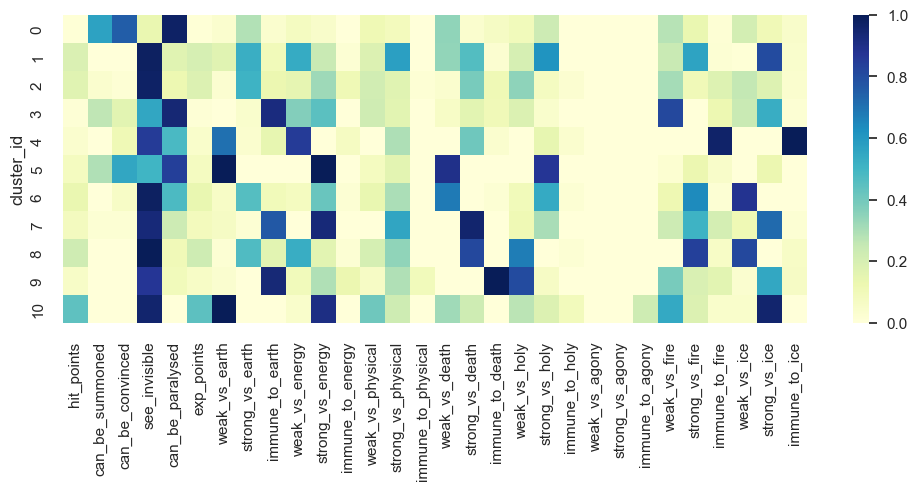

In [77]:
seaborn.heatmap(creatures_df_model.groupby("cluster_id").mean(),cmap="YlGnBu")
